In [1]:
# Constants
DATA_PATH = '../Data/Processed/0_DataCleaned_df.csv'
PKL_EXPORT_PATH = "../data/processed/1_EDA_df.pkl"
CSV_EXPORT_PATH = "../data/processed/1_EDA_df.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import seaborn as sns
import pickle
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
# To plot pretty figures
%matplotlib inline

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", "EDA")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
df = pd.read_csv(DATA_PATH)

In [5]:
df.sample(1)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,avg_salary,job_title,seniority,desc_len,tools,techs,education,company_name,job_state,age
113,Lead Data Engineer - CCRD,Employer Provided Salary:$76K - $152K,Make banking a Fifth Third better®\r\n\r\nWe c...,3.7,Fifth Third Bank\r\n3.7,Remote,10000+ Employees,1989,Company - Public,Investment & Asset Management,...,114.0,data engineer,senior,4468,2,5,1,Fifth Third Bank,Remote,34


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          1217 non-null   object 
 1   Salary Estimate    1217 non-null   object 
 2   Job Description    1217 non-null   object 
 3   Rating             1217 non-null   float64
 4   Company Name       1217 non-null   object 
 5   Location           1217 non-null   object 
 6   Size               1217 non-null   object 
 7   Founded            1217 non-null   int64  
 8   Type of ownership  1217 non-null   object 
 9   Industry           1217 non-null   object 
 10  Sector             1217 non-null   object 
 11  Revenue            1217 non-null   object 
 12  hourly             1217 non-null   int64  
 13  employer_provided  1217 non-null   int64  
 14  min_salary         1217 non-null   int64  
 15  max_salary         1217 non-null   int64  
 16  avg_salary         1217 

In [7]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'job_title', 'seniority',
       'desc_len', 'tools', 'techs', 'education', 'company_name', 'job_state',
       'age'],
      dtype='object')

In [8]:
eda_df= df[['min_salary','max_salary','avg_salary','job_title','seniority','age','company_name','job_state','Rating','Job Description','desc_len', 'Size', 'Type of ownership', 'Industry' 
            ,'Sector', 'Revenue','tools','techs','education','hourly','employer_provided']]

In [9]:
eda_df.sample()

,min_salary,max_salary,avg_salary,job_title,seniority,age,company_name,job_state,Rating,Job Description,...,Size,Type of ownership,Industry,Sector,Revenue,tools,techs,education,hourly,employer_provided
393,160,255,207.5,data scientist,na,7,Notion,New York-NY,4.8,About Us:\r\nWe're on a mission to make it pos...,...,201 to 500 Employees,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $100 million (USD),3,2,0,0,1


## Exploratory Data Analysis

### Numerical Columns

In [10]:
eda_df.describe()

,min_salary,max_salary,avg_salary,age,Rating,desc_len,tools,techs,education,hourly,employer_provided
count,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000
mean,100.243221,137.454396,118.848809,29.178307,3.232703,3013.184881,2.654067,2.760887,0.590797,0.166804,0.649137
std,37.218306,55.152478,44.431452,44.575301,1.815979,2224.944589,1.741842,1.820800,0.781265,0.372954,0.477436
min,5.000000,7.000000,6.000000,-1.000000,-1.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,100.000000,88.000000,-1.000000,3.400000,1025.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,93.000000,125.000000,110.000000,14.000000,3.900000,2646.000000,2.000000,2.000000,0.000000,0.000000,1.000000
75%,120.000000,165.000000,141.500000,34.000000,4.200000,4552.000000,4.000000,4.000000,1.000000,0.000000,1.000000
max,312.000000,400.000000,336.500000,387.000000,5.000000,15935.000000,10.000000,9.000000,4.000000,1.000000,1.000000


<Axes: >

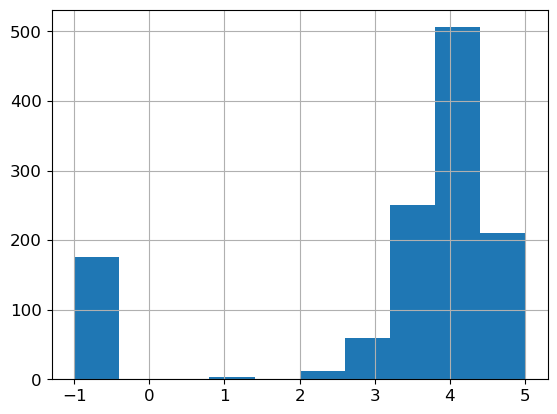

In [11]:
eda_df.Rating.hist()

#### * Seems like the Ratings exists between 3.3 to 5.0 except the  missing values

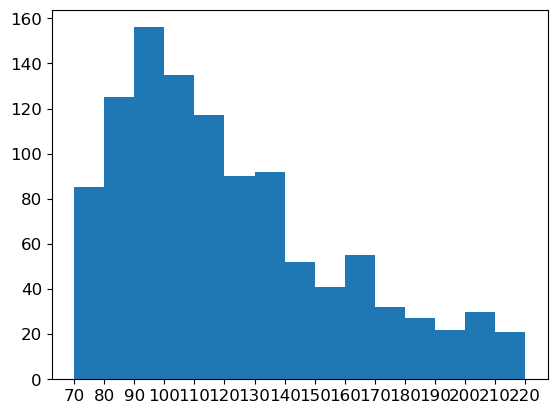

In [12]:
plt.hist(eda_df.avg_salary, bins= np.arange(70,230,10) )
plt.xticks(np.arange(70,230,10))
plt.show()

#### * avg salary most values lies between 80:140 with very low values between 140:220
#### * maybe we need to use stratified split to ensure every data point in each class is as observed in the original dataset 

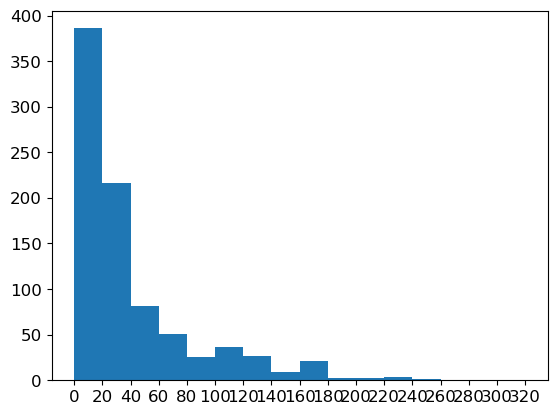

In [13]:
plt.hist(eda_df.age, bins= np.arange(0,330,20))
plt.xticks(np.arange(0,330,20))
plt.show()

#### * most companies are under the age of 30, maybe we need to normalize this column or divide it to buckets

<Axes: >

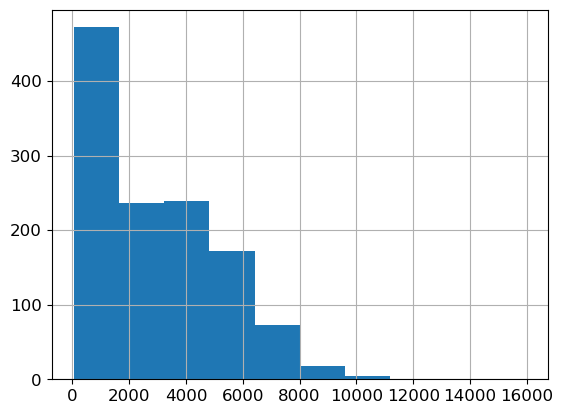

In [14]:
eda_df.desc_len.hist()

#### * most description length is in 0:2000 characters range

<Axes: >

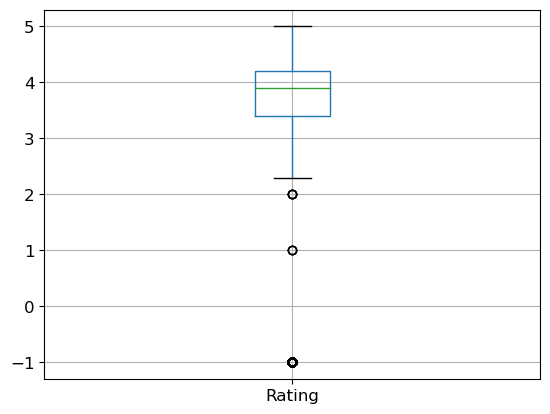

In [15]:
df.boxplot(column=['Rating'])

<Axes: >

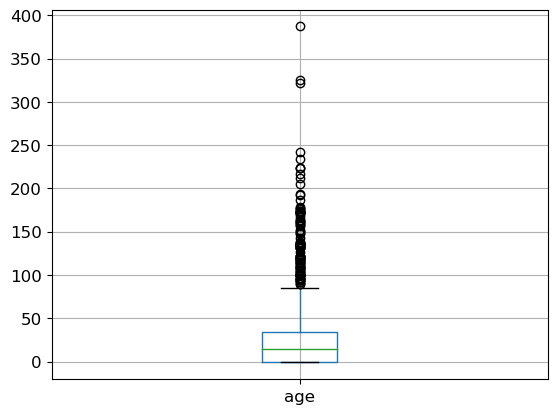

In [16]:
df.boxplot(column=['age']) 

<Axes: >

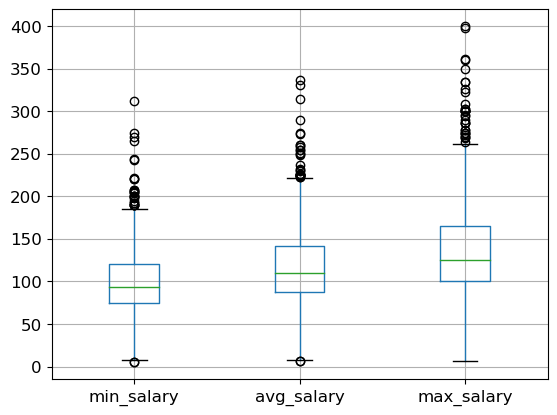

In [17]:
df.boxplot(column=['min_salary','avg_salary','max_salary'])

<Axes: >

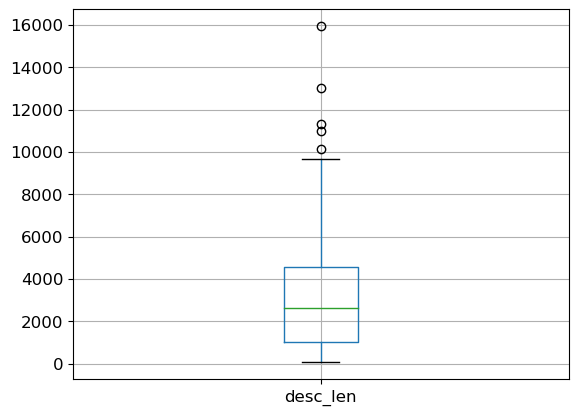

In [18]:
df.boxplot(column=['desc_len'])

In [19]:
eda_df[['age','Rating','desc_len','tools','techs','education','hourly','employer_provided','avg_salary']].corr()

,age,Rating,desc_len,tools,techs,education,hourly,employer_provided,avg_salary
age,1.000000,0.239103,0.181899,-0.010347,0.093541,0.098585,-0.206980,-0.146833,-0.076513
Rating,0.239103,1.000000,0.178125,-0.057647,0.103318,0.043987,-0.229294,-0.155209,0.065093
desc_len,0.181899,0.178125,1.000000,0.484188,0.630377,0.430411,-0.249399,0.021392,0.174798
tools,-0.010347,-0.057647,0.484188,1.000000,0.519456,0.373297,-0.006046,-0.012572,0.135537
techs,0.093541,0.103318,0.630377,0.519456,1.000000,0.404049,-0.204008,-0.061585,0.200833
education,0.098585,0.043987,0.430411,0.373297,0.404049,1.000000,-0.129636,-0.043498,0.022855
hourly,-0.206980,-0.229294,-0.249399,-0.006046,-0.204008,-0.129636,1.000000,0.328950,-0.170758
employer_provided,-0.146833,-0.155209,0.021392,-0.012572,-0.061585,-0.043498,0.328950,1.000000,0.274816
avg_salary,-0.076513,0.065093,0.174798,0.135537,0.200833,0.022855,-0.170758,0.274816,1.000000


### * Both desc_len, tools, techs and employer_provided columns has a slightly positive correlation with avg salary

### * Hourly column has a slightly negative correlation

<Axes: >

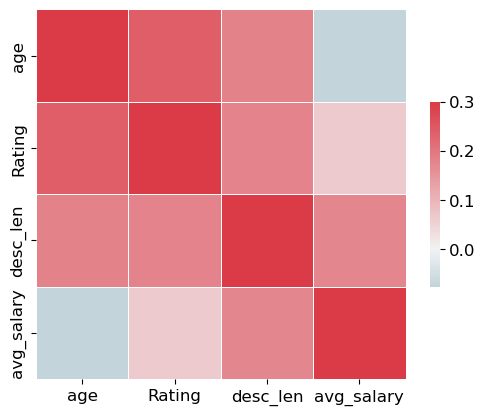

In [20]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(eda_df[['age','Rating','desc_len','avg_salary']].corr(), vmax =.3, center = 0, cmap=cmap,
            square = True , linewidths=0.5, cbar_kws={"shrink":0.5})

### Categorical Columns

In [21]:
eda_df.columns

Index(['min_salary', 'max_salary', 'avg_salary', 'job_title', 'seniority',
       'age', 'company_name', 'job_state', 'Rating', 'Job Description',
       'desc_len', 'Size', 'Type of ownership', 'Industry', 'Sector',
       'Revenue', 'tools', 'techs', 'education', 'hourly',
       'employer_provided'],
      dtype='object')

In [22]:
cat_eda_df = eda_df[['job_title', 'seniority', 'company_name', 'job_state' ,'Size', 'Type of ownership', 'Industry',
       'Sector', 'Revenue']]

graph for job_title: total = 1217
Saving figure job_title histogram_plot


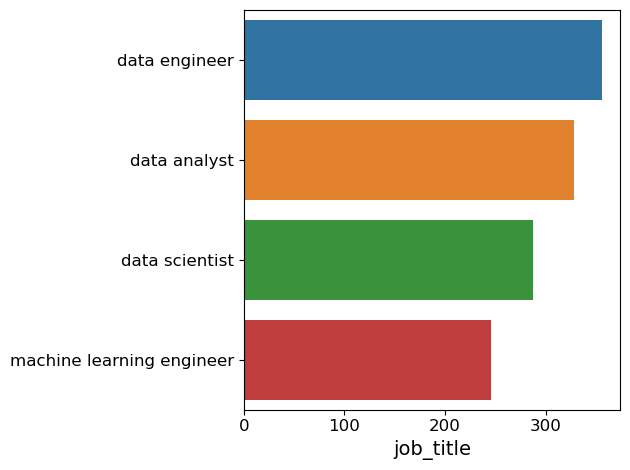

graph for seniority: total = 1217
Saving figure seniority histogram_plot


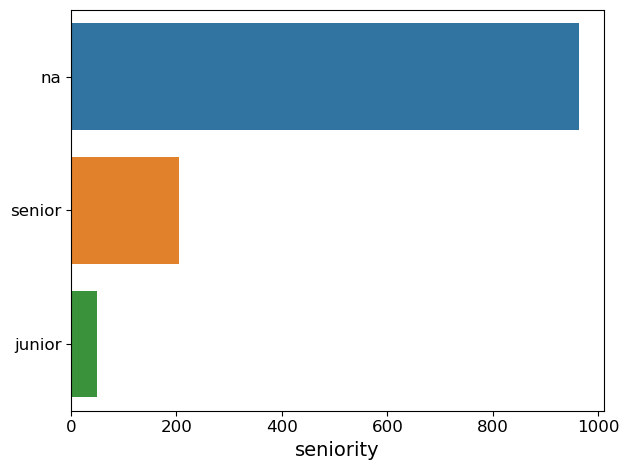

graph for company_name: total = 1217
Saving figure company_name histogram_plot


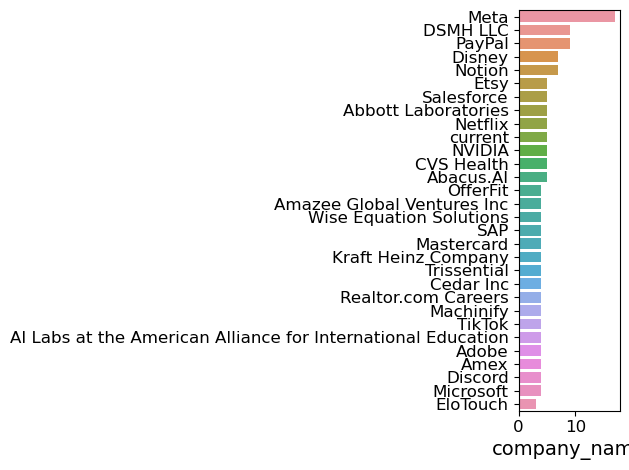

graph for job_state: total = 1217
Saving figure job_state histogram_plot


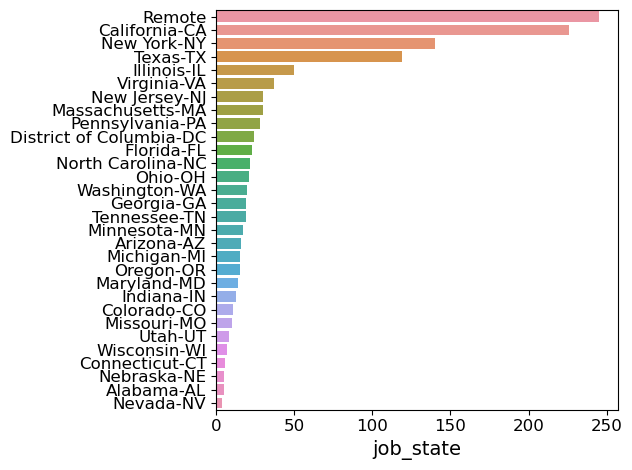

graph for Size: total = 1217
Saving figure Size histogram_plot


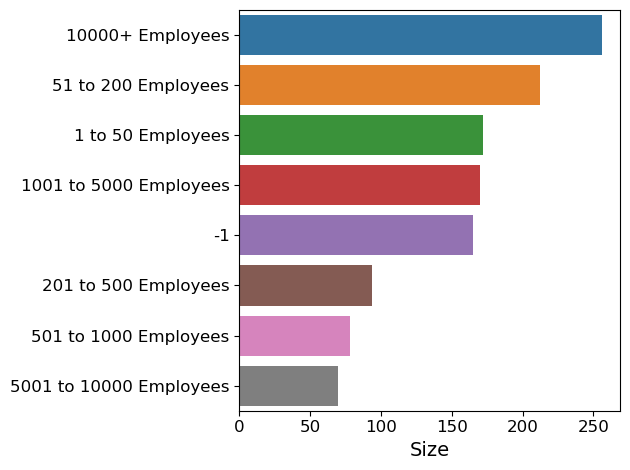

graph for Type of ownership: total = 1217
Saving figure Type of ownership histogram_plot


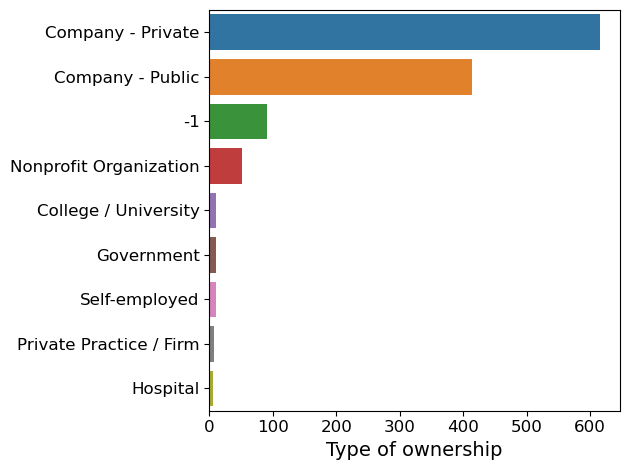

graph for Industry: total = 1217
Saving figure Industry histogram_plot


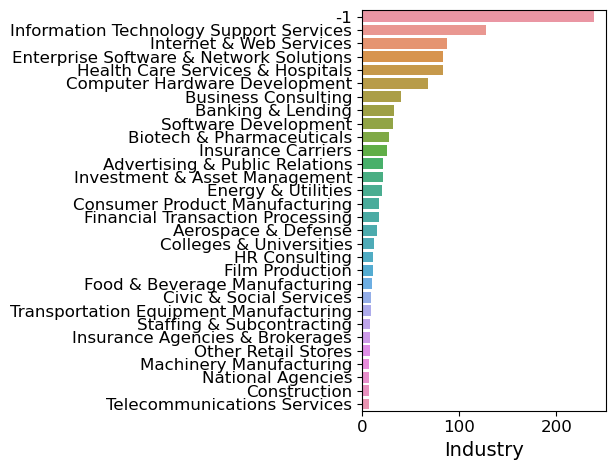

graph for Sector: total = 1217
Saving figure Sector histogram_plot


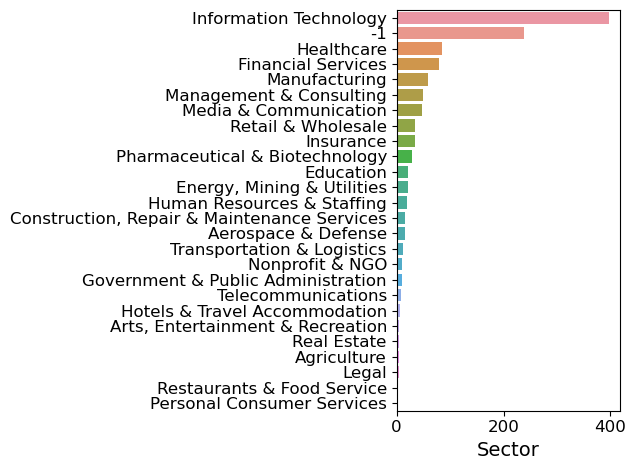

graph for Revenue: total = 1217
Saving figure Revenue histogram_plot


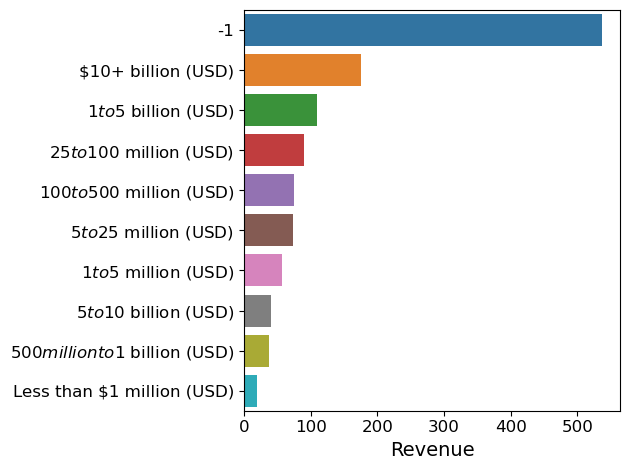

In [23]:
for i in cat_eda_df.columns:
    val_counts = cat_eda_df[i].value_counts()[:30]
    print("graph for %s: total = %d" % (i, len(cat_eda_df)))
    chart = sns.barplot(x=val_counts, y=val_counts.index)
    # chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    save_fig(i+" histogram_plot")
    plt.show()

In [24]:
pd.pivot_table(eda_df, index = 'job_title', values ='avg_salary')

,avg_salary
job_title,
data analyst,85.888720
data engineer,116.737360
data scientist,128.756098
machine learning engineer,154.292683


In [25]:
pd.pivot_table(eda_df, index =['job_title','seniority'], values='avg_salary')

avg_salary
job_title                 seniority            
data analyst              junior      57.833333
                          na          85.552083
                          senior     113.250000
data engineer             junior      91.464286
                          na         114.697026
                          senior     129.102740
data scientist            junior      94.333333
                          na         123.854839
                          senior     157.481818
machine learning engineer junior      86.500000
                          na         149.378307
                          senior     173.645455

In [26]:
pd.pivot_table(eda_df, index = ['job_state','job_title'], values = 'avg_salary').sort_values('avg_salary', ascending = False).head(60)

,,avg_salary
job_state,job_title,
Virginia-VA,machine learning engineer,250.000000
Oregon-OR,machine learning engineer,172.833333
Georgia-GA,machine learning engineer,169.800000
California-CA,machine learning engineer,167.454545
New York-NY,machine learning engineer,162.781250
California-CA,data scientist,159.327869
New York-NY,data scientist,152.271429
Pennsylvania-PA,machine learning engineer,151.166667
District of Columbia-DC,machine learning engineer,150.500000


In [27]:
pd.pivot_table(eda_df, index = ['job_state','job_title'], values = 'avg_salary', aggfunc='count').sort_values('avg_salary', ascending = False).head(60)

avg_salary
job_state               job_title                            
California-CA           machine learning engineer          88
Remote                  data engineer                      75
                        data analyst                       65
California-CA           data scientist                     61
Remote                  data scientist                     55
New York-NY             data analyst                       52
Remote                  machine learning engineer          50
California-CA           data engineer                      48
Texas-TX                data engineer                      40
New York-NY             data scientist                     35
                        machine learning engineer          32
California-CA           data analyst                       29
Texas-TX                data scientist                     29
                        data analyst                       26
                        machine learning engineer          24
Illinois-IL             data engineer                      24
New York-NY             data engineer                      21
Massachusetts-MA        data engineer                      16
Virginia-VA             data engineer                      14
                        data scientist                     13
Florida-FL              data analyst                       13
Tennessee-TN            data analyst                       12
Pennsylvania-PA         data engineer                      11
District of Columbia-DC data analyst                       11
Illinois-IL             data analyst                       11
Ohio-OH                 data scientist                     11
New Jersey-NJ           data scientist                     10
Illinois-IL             data scientist                     10
Indiana-IN              data analyst                       10
North Carolina-NC       data engineer                       9
Virginia-VA             data analyst                        9
Arizona-AZ              data engineer                       9
Washington-WA           machine learning engineer           9
New Jersey-NJ           data analyst                        9
Oregon-OR               data engineer                       8
Massachusetts-MA        machine learning engineer           8
Pennsylvania-PA         data analyst                        8
North Carolina-NC       data analyst                        8
New Jersey-NJ           data engineer                       8
District of Columbia-DC data engineer                       8
Florida-FL              data engineer                       7
Pennsylvania-PA         data scientist                      6
Tennessee-TN            data engineer                       6
Washington-WA           data analyst                        6
Maryland-MD             data engineer                       6
Colorado-CO             data analyst                        6
Georgia-GA              data engineer                       6
Minnesota-MN            data scientist                      6
Michigan-MI             data engineer                       5
                        data analyst                        5
Georgia-GA              data analyst                        5
Utah-UT                 data analyst                        5
Georgia-GA              machine learning engineer           5
Illinois-IL             machine learning engineer           5
Minnesota-MN            data engineer                       5
Missouri-MO             data engineer                       4
Minnesota-MN            machine learning engineer           4
Ohio-OH                 data analyst                        4
North Carolina-NC       data scientist                      4
Michigan-MI             data scientist                      4

In [28]:
pd.pivot_table(df[df.job_title == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
California-CA,159.327869
New York-NY,152.271429
Massachusetts-MA,130.833333
Remote,129.190909
Alabama-AL,125.500000
Missouri-MO,119.750000
Illinois-IL,118.900000
Texas-TX,116.448276
Virginia-VA,114.846154


In [29]:
df_pivots = eda_df[['Rating', 'Industry', 'Sector', 'Revenue', 'Type of ownership', 'Size','avg_salary']] 

In [30]:
for i in df_pivots:
    if i == 'avg_salary':
        break
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary',aggfunc={'avg_salary': ['count','mean']}).sort_values('mean', ascending = False))


        count        mean
Rating                   
 4.8       15  160.866667
 4.6       33  147.212121
 4.4       44  137.386364
 4.3       54  126.842593
 4.2       86  125.098837
 4.5       30  122.866667
 4.1       76  122.572368
 3.3       26  122.269231
 3.5       40  121.637500
 4.0       89  119.129213
 3.9      126  119.091270
 4.9       17  117.058824
 3.8       75  116.640000
-1.0      176  116.031250
 3.7       86  115.831395
 5.0       57  111.517544
 3.6       45  110.322222
 3.4       27  110.185185
 3.2       27  109.537037
 4.7       14  108.607143
 3.0       17  107.117647
 2.8        4  103.375000
 2.4        4  102.500000
 3.1       14  101.964286
 2.7        5  100.100000
 2.6        7   92.357143
 2.0        4   91.375000
 2.9       12   91.333333
 1.0        3   89.000000
 2.5        1   65.500000
 2.3        3   51.000000
                                      count        mean
Industry                                               
Pet & Pet Supplies Stores     

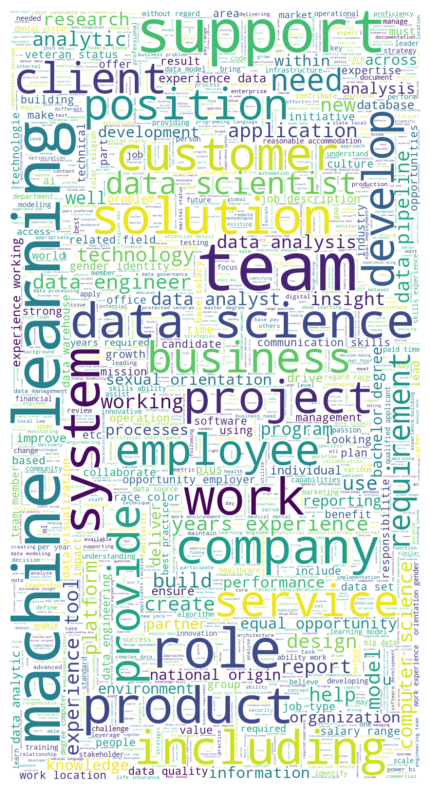

In [31]:
words = " ".join(eda_df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()